E: -295.6187264093084
E: -236.203033514
E: -286.935088152
E: -229.02013962
E: -148.734720695


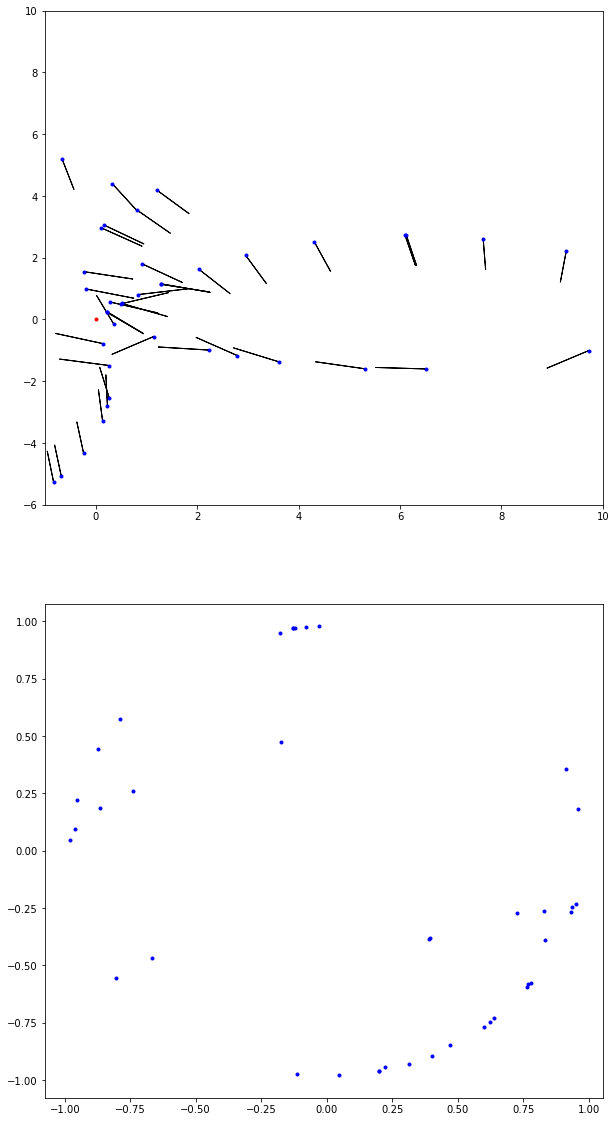

In [124]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
data = [(0.29, 0.562), (0.917, 1.799), (0.813, 3.543), (0.33, 4.39), (-0.66, 5.184), (-0.2, 0.99), (-0.24, 1.549), (0.11, 2.966), (0.16, 3.06), (1.2, 4.194),
       (0.21989799999999998, 0.23319099999999998), (0.23002199999999998, 0.243645), (0.500425, 0.505032), (0.514768, 0.518327), (0.8433459999999999, 0.8059480000000001), (1.27789, 1.1414900000000001), (1.2937299999999998, 1.15282), (6.09883, 2.72416), (6.12293, 2.72787), (2.03429, 1.6247), (2.95577, 2.0769800000000003), (4.31039, 2.50972), (9.275030000000001, 2.2054300000000002), (7.63803, 2.61114),
       (0.15,-0.784), (0.267, -1.491), (0.265,-2.529), (0.232, -2.791), (0.136, -3.273), (-0.83, -5.257), (-0.68, -5.056), (-0.24, -4.311),
       (0.36,-0.158), (1.14, -0.554), (2.23, -0.99), (3.61, -1.37), (5.31, -1.597), (6.52, -1.602), (2.79, -1.167), (9.72, -1.007)]
(-0.05,-0.42)
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y in data:
    d = math.sqrt(x**2 + y**2)
    rotors.append((x/d, y/d))


T = 1
dK = 1
for it in range(5):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        weights = 0
        v1x,v1y = rotors[i1]
        x1,y1 = data[i1]
        ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        ct = 2*ca**2 - 1
        K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2 = data[i2]
            v2x,v2y = rotors[i2]
            
            ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
            ct2 = 2*ca2**2 - 1
            K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))
            
            if abs(K2 - K) < dK:
                
                phi = math.atan2(y2-y1, x2-x1)
                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sx += (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sy += (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
        
        magS = math.sqrt(sx**2 + sy**2)
        newx = sx/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        newy = sy/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    T *= 0.9
    dK*= 0.9

plt.figure(figsize = (10,20))
plt.subplot(211)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-1,10,-6,10])

plt.subplot(212)
plt.plot([x for x,y in rotors], [y for x,y in rotors], 'b.')
plt.show()

#print(data)
#print(rotors)

-1.5707963267948966
E: -184.51278280741238


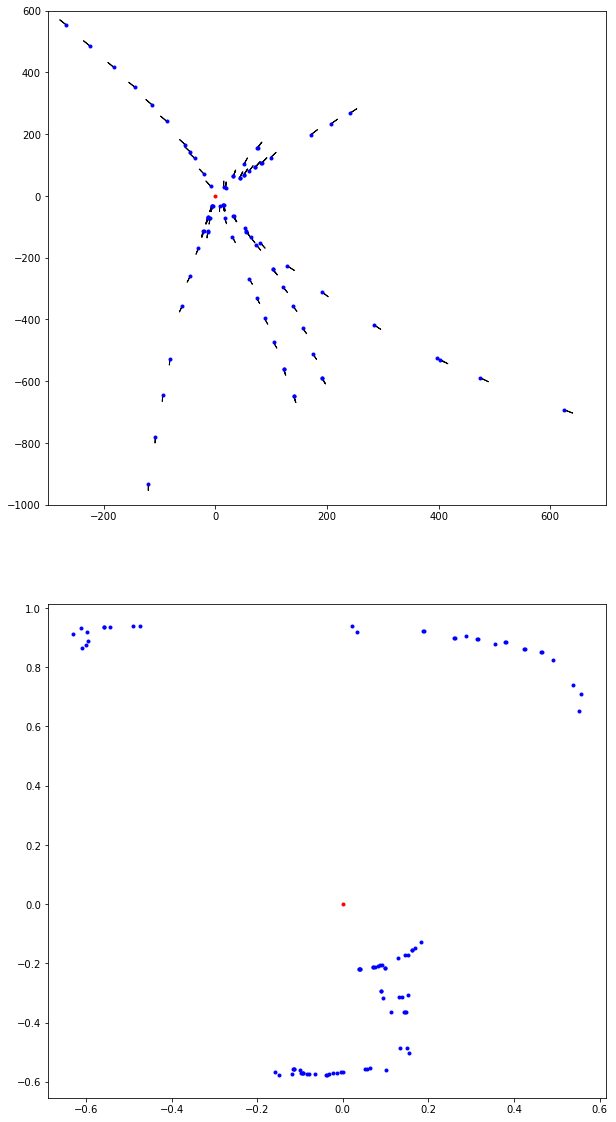

In [13]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))

print(math.atan2(-1, 0))
T = 10
#dK = 100000
#numClose = 10
for it in range(1):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]
        
        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        
        centreAngle = 2 * ra - 2 * a
        #ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        #ct = 2*ca**2 - 1
        #K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2,z2 = data[i2]
            v2x,v2y,v2z = rotors[i2]
            
            b = math.atan2(y2, x2)
            phi = math.atan2(y2-y1, x2-x1)
            subtendedAngle = phi - b

            if (abs(centreAngle - 2*subtendedAngle) < 1):
                #print(":", centreAngle, subtendedAngle)
            
                #ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
                #ct2 = 2*ca2**2 - 1
                #K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))

                #if abs(K2 - K) < dK:

                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sugx = (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sugy = (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
                if abs(math.atan2(sugy, sugx) - math.atan2(y1, x1)) > math.pi/2:
                    sx += sugx
                    sy += sugy
        
        newx = math.tanh(-sx/T)
        newy = math.tanh(-sy/T)
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy, v1z))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    #T *= 0.9
    #dK*= 0.5

plt.figure(figsize = (10,20))
plt.subplot(211)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.05
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-300,700,-1000,600])

plt.subplot(212)
plt.plot([x for x,y,z in rotors], [y for x,y,z in rotors], 'b.')
plt.plot([0], [0], 'r.')
plt.show()

-1.5707963267948966
98.6442 124.154 : 	 0.0 0.14 	 -126.449 	 -0.28 0.28
82.3585 105.872 : 	 0.0 0.16 	 -102.011 	 -0.32 0.32
82.6824 106.236 : 	 0.0 0.16 	 -102.497 	 -0.32 0.32
71.1778 92.8775 : 	 0.0 0.179 	 -84.893 	 -0.357 0.357
71.4931 93.2636 : 	 0.0 0.178 	 -85.391 	 -0.356 0.356
73.0354 -157.92 : 	 0.0 0.046 	 -141.869 	 -0.092 0.092
60.1184 79.7438 : 	 0.0 0.202 	 -67.744 	 -0.403 0.403
-54.1753 165.575 : 	 0.0 -0.014 	 -142.09 	 0.027 -0.027
63.3417 -134.233 : 	 0.0 0.058 	 -116.305 	 -0.116 0.116
50.8396 68.3407 : 	 0.0 0.227 	 -53.055 	 -0.455 0.455
51.1246 68.7387 : 	 0.0 0.226 	 -53.544 	 -0.453 0.453
-44.8802 141.85 : 	 0.0 -0.014 	 -116.658 	 0.028 -0.028
-22.2046 -114.122 : 	 0.0 -0.15 	 -84.14 	 0.299 -0.299
54.952 -114.613 : 	 0.0 0.073 	 -94.983 	 -0.145 0.145
55.3136 -115.388 : 	 0.0 0.072 	 -95.838 	 -0.144 0.144
43.2494 58.7609 : 	 0.0 0.254 	 -40.839 	 -0.509 0.509
43.5399 59.1367 : 	 0.0 0.253 	 -41.314 	 -0.506 0.506
-37.4606 121.916 : 	 0.0 -0.014 	 -95.419 

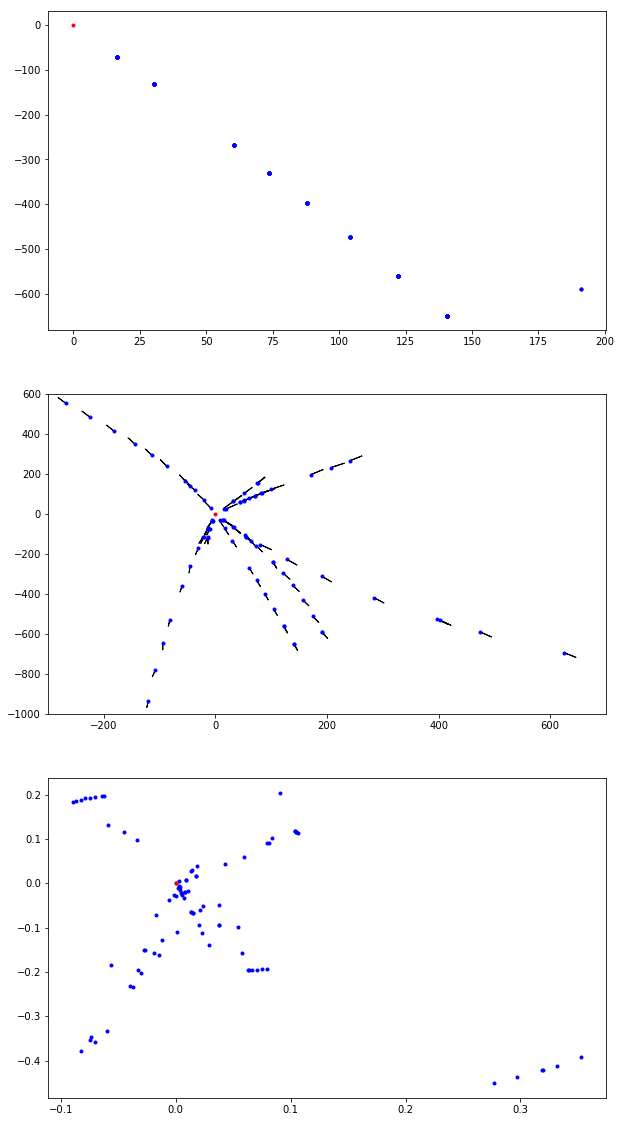

In [10]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (60.1184, 79.7438, -818.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (18.3987, 26.0333, -262.633), (-6.02516, -31.1495, 70.1153), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (16.3643, -70.7321, 319.102), (-21.2823, -114.332, 264.273), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (240.578, 267.294, -2948.5), (206.721, 233.044, -2548.5), (171.297, 198.543, -2148.5), (-45.4458, -260.608, 605.0), (-59.6324, -356.696, 827.6), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))

def principalValue(theta):
    while theta > math.pi:
        theta -= 2*math.pi
    while theta < -math.pi:
        theta += 2*math.pi
    return theta

plt.figure(figsize = (10,20))
plt.subplot(311)

print(math.atan2(-1, 0))
T = 10
cutoff = 0.1
#dK = 100000
#numClose = 10
for it in range(10):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]
        
        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        
        centreAngle = 2 * ra - 2 * a
        #ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        #ct = 2*ca**2 - 1
        #K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2,z2 = data[i2]
            v2x,v2y,v2z = rotors[i2]
            
            b = math.atan2(y2, x2)
            phi = math.atan2(y2-y1, x2-x1)
            subtendedAngle = phi - b
            
            if math.sqrt(x1**2 + y1**2) > math.sqrt(x2**2 + y2**2): #Assumes no more than half-revolution of helix
                subtendedAngle = math.pi - subtendedAngle
            
            if (x1, y1, z1) == (7.26409, -31.2903, 139.642):#(140.52, -649.15, 2945.5):#(18.3987, 26.0333, -262.633):#(-120.266, -934.294, 2152.5):#(-6.02516, -31.1495, 70.1153):
                if (abs(principalValue(centreAngle - 2*subtendedAngle)) < cutoff and
                    abs(b - a) < cutoff):
                    #plt.plot([abs(principalValue(centreAngle - 2*subtendedAngle))], [b-a], 'b.')
                    plt.plot([x2], [y2], 'b.')
                print(x2, y2, ":",
                      "\t", round(centreAngle,3), round(subtendedAngle,3),
                      "\t", round((math.sqrt(x1**2 + y1**2) - math.sqrt(x2**2 + y2**2)), 3),
                      "\t", round(principalValue(centreAngle - 2*subtendedAngle),3), round(principalValue(centreAngle - 2*(math.pi - subtendedAngle)),3))
                
            #if (abs(principalValue(centreAngle - 2*subtendedAngle)) < 0.5 or
            #    abs(principalValue(centreAngle - 2*(math.pi - subtendedAngle))) < 0.5):
            if (abs(principalValue(centreAngle - 2*subtendedAngle)) < cutoff and
                abs(b - a) < cutoff):
                #if (x1, y1, z1) == (-120.266, -934.294, 2152.5):
                #    print(x2, y2)
                

                #ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
                #ct2 = 2*ca2**2 - 1
                #K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))

                #if abs(K2 - K) < dK:

                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sugx = (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sugy = (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
                if abs(math.atan2(sugy, sugx) - math.atan2(y1, x1)) < math.pi/2:
                    sx += sugx
                    sy += sugy
        
        newx = math.tanh(sx/T)
        newy = math.tanh(sy/T)
        
        if newx == 0 and newy == 0:
            newx = v1x
            newy = v1y
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy, v1z))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    T *= 0.9
    cutoff *= 0.7
    #dK*= 0.5


plt.plot([0], [0], 'r.')
#plt.axis([-300,700,-1000,600])

plt.subplot(312)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.03
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-300,700,-1000,600])

plt.subplot(313)
plt.plot([x for x,y,z in rotors], [y for x,y,z in rotors], 'b.')
plt.plot([0], [0], 'r.')
plt.show()

c: 0.10432525495260148
1
[0.0007864807881253605, 0.0011519179404991863, 0.001208325012165178, 0.002503983105961477, 0.003023526310278341]
iter 0: 16.917
iter 1: 16.805
iter 2: 16.663
iter 3: 16.493


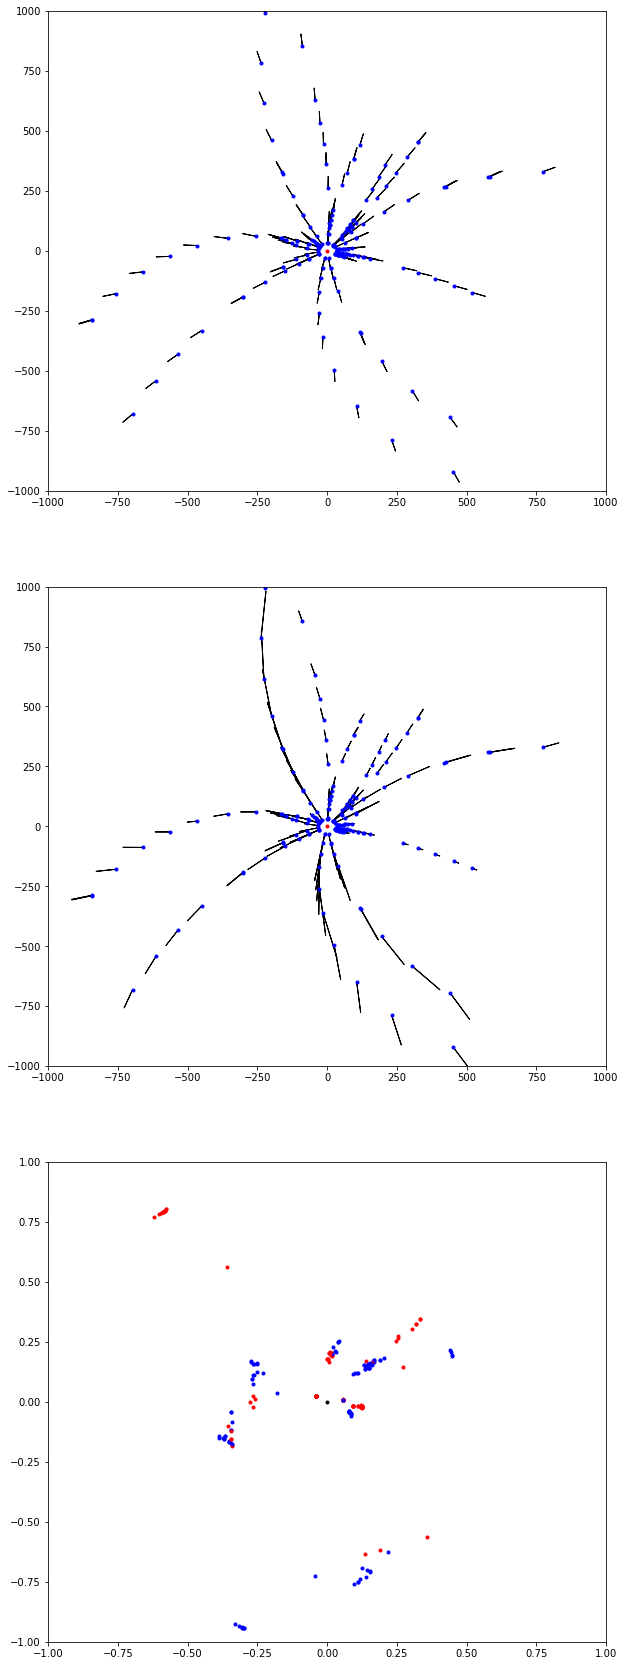

In [273]:
import math
import matplotlib.pyplot as plt
import random

centrePhi = random.uniform(-math.pi, math.pi)
print("c:", centrePhi)
#centrePhi = 2.2
thetas = []
curvature = random.randint(0,1)*2 - 1
print(curvature)

for i in range(5):
    thetas.append(random.uniform(0, curvature * math.pi/1000))

thetas.sort(key = lambda x: abs(x))

print(thetas)

R = 100000
data = []

rotors = []

for i in range(len(thetas)):
    theta = thetas[i]
    data.append((-R*math.cos(theta + centrePhi) + R*math.cos(centrePhi), -R*math.sin(theta + centrePhi) + R*math.sin(centrePhi), 0))
    #rotors.append((curvature * math.sin(theta + centrePhi), -curvature * math.cos(theta + centrePhi), 0))
    #rotors.append((-math.sin(theta), math.cos(theta), 0))
#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
data = [(59.9066, -24.6788, -1498.0), (94.6938, -17.5662, -1502.0), (87.6481, 10.6346, -1502.5), (51.8598, -21.6163, -1298.0), (82.1165, -15.4722, -1302.0), (76.0343, 9.51993, -1302.5), (43.9802, -18.5361, -1102.5), (43.7821, -18.4869, -1098.0), (43.9562, -18.5489, -1102.0), (69.5197, -13.2707, -1102.0), (69.2116, -13.196, -1097.5), (64.4202, 8.35511, -1102.5), (64.1678, 8.33498, -1098.0), (94.1312, 126.467, -1098.0), (94.4023, 126.972, -1102.0), (22.8798, 169.268, -1098.0), (38.3957, -16.3453, -962.5), (38.2004, -16.229, -958.0), (38.3569, -16.3305, -962.0), (60.7064, -11.669, -962.0), (60.4065, -11.6504, -957.5), (56.2785, 7.46357, -962.5), (55.9918, 7.45193, -958.0), (83.6368, 109.525, -958.0), (83.9407, 110.019, -962.0), (18.0781, 148.236, -958.0), (32.7893, -14.0826, -822.5), (32.6246, -13.9736, -818.0), (51.893, -10.0673, -822.0), (32.7783, -14.0656, -822.0), (152.16, -32.0637, -818.0), (51.617, -10.0558, -817.5), (48.111, 6.57, -822.5), (102.691, 117.65, -818.0), (72.7167, 92.8523, -818.0), (73.0032, 93.3447, -822.0), (13.8147, 127.083, -818.0), (13.9074, 127.698, -822.0), (28.0332, -12.1063, -702.5), (27.8733, -12.0055, -698.0), (28.0334, -12.1037, -702.0), (44.3493, -8.71905, -702.0), (130.266, -26.3492, -698.0), (44.1017, -8.66188, -697.5), (130.995, -26.5272, -702.0), (41.1498, 5.77137, -702.5), (40.9015, 5.73162, -698.0), (62.992, 78.778, -698.0), (89.0119, 100.432, -702.0), (88.5338, 99.8472, -698.0), (10.4647, 108.858, -698.0), (10.5915, 109.459, -702.0), (37.8648, -7.48498, -598.0), (38.0987, -7.52693, -602.0), (111.847, -21.8632, -598.0), (35.0391, 4.99125, -597.5), (37.8277, -7.46594, -597.5), (112.582, -22.0403, -602.0), (35.3515, 5.06425, -602.5), (35.071, 5.00031, -598.0), (54.667, 67.2018, -598.0), (76.9965, 85.8, -602.0), (76.5133, 85.2149, -598.0), (8.09521, 93.6189, -598.0), (21.3745, 24.5993, -220.422), (1.54414, 33.8455, -211.319), (31.6927, -5.18613, -164.508), (22.0565, 23.2445, -163.124), (23.062, 24.3357, -170.968), (1.41843, 31.9052, -198.874), (-29.1312, -14.5807, -111.336), (28.6688, 15.0984, -97.0176), (2.19961, 31.3653, -100.998), (-28.8932, -14.1201, -64.4281), (-29.7833, -14.5938, -66.6123), (-7.92645, -31.5381, -0.395386), (-7.81242, -31.0486, -0.299115), (5.26833, -31.4636, 40.4573), (22.4734, 22.0345, 49.7859), (23.9063, 23.3792, 52.545), (-17.1635, 26.8242, 8.37987), (-31.8557, -5.64698, 83.9967), (-28.8544, 13.6847, 85.9536), (-31.16, 14.6296, 92.0151), (-31.3037, 3.29024, 170.726), (5.13573, 71.8207, -455.859), (69.9505, -12.5462, -370.733), (71.65, -12.899, -379.924), (49.1698, 53.2383, -376.416), (-63.488, -33.5351, -252.449), (63.6876, 33.2617, -222.171), (4.27349, 71.289, -236.837), (-64.6562, -32.7752, -152.113), (-15.7252, -69.9564, -7.84605), (-37.6347, 60.4934, 11.6294), (13.3849, -70.3718, 83.8818), (13.8609, -72.4397, 86.196), (52.0733, 49.3082, 106.232), (-70.271, -17.3578, 180.565), (-65.355, 28.1478, 184.54), (-67.4067, 28.8773, 190.02), (-72.1138, 12.1402, 388.841), (102.168, 52.8684, -359.219), (104.013, 53.7995, -365.767), (5.62263, 115.43, -386.568), (-101.778, -53.4869, -244.48), (-22.4295, -114.285, -16.5174), (-59.6997, 99.2051, 15.3406), (24.2091, -113.263, 132.232), (86.2797, 78.5104, 169.435), (-110.041, -35.424, 287.78), (-107.351, 41.3183, 295.177), (-109.298, 41.8406, 300.252), (-150.848, -83.1792, -369.23), (-27.5721, -170.021, -27.2114), (-85.3814, 148.076, 20.0537), (-86.2708, 149.851, 20.2263), (40.6794, -166.929, 193.681), (129.683, 112.399, 246.798), (-157.173, -67.1197, 428.755), (-158.64, -68.363, 433.512), (-162.364, 53.0586, 437.308), (-164.172, 53.3604, 441.959), (-109.976, 25.0185, 598.0), (-26.3324, 20.4764, 702.0), (-26.1765, 20.3513, 697.5), (-26.3427, 20.5116, 702.5), (-127.37, 32.5539, 698.0), (-30.743, 24.2547, 822.0), (-30.5821, 24.1141, 817.5), (-30.7645, 24.2768, 822.5), (-148.176, 43.5202, 822.0), (-147.515, 43.1446, 818.0), (-35.6174, 28.6119, 957.5), (-35.7969, 28.7681, 962.5), (-40.6203, 33.1477, 1097.5), (-40.7976, 33.3109, 1102.5), (-47.6097, 39.7748, 1297.5), (-54.5216, 46.5329, 1497.5), (520.433, -173.939, -2948.5), (325.349, 452.748, -2948.5), (325.253, 452.447, -2945.5), (208.569, 359.35, -2951.5), (117.444, 440.503, -2951.5), (455.206, -145.879, -2551.5), (286.29, 390.078, -2554.5), (184.727, 308.671, -2545.5), (95.2191, 382.385, -2551.5), (94.9134, 381.392, -2548.5), (387.503, -116.466, -2151.5), (246.718, 325.459, -2154.5), (161.479, 257.892, -2145.5), (72.0813, 323.908, -2148.5), (-43.0103, 629.612, -2145.5), (326.617, -91.0185, -1798.5), (210.684, 268.881, -1798.5), (141.185, 213.788, -1795.5), (53.4005, 272.839, -1798.5), (-25.4588, 531.809, -1804.5), (-533.151, -430.725, -1498.5), (273.779, -70.8576, -1498.5), (179.272, 221.614, -1498.5), (-12.7656, 444.183, -1504.5), (-449.881, -332.703, -1218.5), (-3.56, 360.6, -1218.5), (3.49333, 261.608, -881.6), (-222.064, -131.145, -555.6), (-27.4813, -259.074, -45.0), (-122.862, 228.784, 27.0), (203.478, 162.391, 372.2), (-254.504, 60.4809, 671.4), (-302.782, -193.412, -777.8), (-300.443, -191.462, -771.4), (-14.7667, -359.051, -65.2), (-160.831, 328.414, 36.6), (-158.783, 322.353, 35.4), (120.63, -344.674, 406.6), (117.538, -339.133, 400.0), (290.573, 211.034, 512.6), (-356.027, 52.1851, 931.92), (25.4778, -495.866, -94.0), (-198.866, 460.777, 47.4), (195.56, -458.567, 554.6), (424.722, 267.085, 716.0), (419.071, 265.127, 707.5), (106.018, -647.809, -128.8), (-226.371, 616.601, 60.4), (305.099, -582.442, 734.8), (584.33, 309.441, 948.6), (578.479, 308.33, 940.2), (-465.303, 21.9242, 1221.5), (-563.362, -23.1158, 1498.5), (-658.996, -87.6892, 1795.5), (-88.7046, 855.23, -2947.5), (-696.993, -680.517, -2155.5), (-612.805, -541.246, -1794.5), (231.508, -787.922, -168.2), (-236.777, 784.195, 76.0), (439.798, -692.759, 921.6), (451.898, -920.266, -222.2), (-222.302, 992.854, 97.6), (772.398, 329.326, 1214.5), (-755.67, -178.636, 2144.5), (-841.99, -288.72, 2555.5), (-842.761, -287.346, 2547.5)]    

rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))

plt.figure(figsize = (10,30))
plt.subplot(311)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.02
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])
    
cutoff = 1
cutoffToZThreshold = 10
for it in range(4):
    suggestions = []
    sumMatches = 0
    numNone = 0
    numItems = 0
    for i1 in range(len(data)):
        numItems += 1
        matches = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]

        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        #print(round(ra,3), round(a,3))

        if (y1 * v1y > 0):
            centreAngle = 2 * abs(ra) - 2 * abs(a)
        else:
            centreAngle = 2*(2 * math.pi - abs(ra) - abs(a))

        while centreAngle < -math.pi:
            centreAngle += 2*math.pi
        while centreAngle > math.pi:
            centreAngle -= 2*math.pi

        centreAngle = abs(centreAngle)
        #assert(abs(centreAngle - abs(thetas[i1])) < 0.01)

        sx = 0
        sy = 0
        n = 0
        angles = []

        for i2 in range(len(data)):
            if (i1 != i2):
                x2,y2,z2 = data[i2]
                v2x,v2y,v2z = rotors[i2]

                b = math.atan2(y2, x2)
                phi = math.atan2(y2-y1, x2-x1)
                if (x1*x2 + y1*y2 > 0 and (abs(a-b) < 0.2 or abs(abs(a-b) - 2*math.pi) < 0.2) and
                    abs(v2z - v1z) < cutoff*cutoffToZThreshold):
                    subtendedAngle = abs(phi) - abs(b)

                    A = math.sqrt(x1**2 + y1**2)
                    B = math.sqrt(x2**2 + y2**2)
                    AB = math.sqrt((x2-x1)**2 + (y2 - y1)**2)

                    subtendedAngle = math.acos((B**2 + AB**2 - A**2)/(2 * B * AB))

                    #while subtendedAngle < 0:
                    #    subtendedAngle += 2*math.pi
                    #while subtendedAngle > 2*math.pi:
                    #    subtendedAngle -= 2*math.pi

                    closer = False
                    if subtendedAngle > math.pi/2: #Means the point i2 lies closer to the origin (on the circle) than i1
                        closer = True
                        subtendedAngle = math.pi - subtendedAngle
                    
                    if abs(2*subtendedAngle - centreAngle) < cutoff:

                        crossProductSign = 1 if x1 * y2 - x2 * y1 > 0 else -1
                        if closer:
                            crossProductSign = -crossProductSign
                        #print(round(a,3), round(subtendedAngle,3))
                        sugAngle = a + crossProductSign * subtendedAngle
                        #if y1 < 0:
                        #    sugAngle = -sugAngle

                        weight = math.sqrt(v2x**2 + v2y**2)
                        sx += weight*math.cos(sugAngle)
                        sy += weight*math.sin(sugAngle)
                        n += 1
                        
                        sx += math.cos(2*phi) * v2x + math.sin(2*phi) * v2y
                        sy += math.sin(2*phi) * v2x - math.cos(2*phi) * v2y
                        n += 1
                        
                        matches += 1

                        angles.append(sugAngle)

                        #print(i1, i2, '\t', round(centreAngle,3), round(subtendedAngle,3),'\t', 'sugA:', sugAngle)

                        #if i1 != i2:
                            #assert(abs(2 * subtendedAngle - centreAngle) < 0.001)
        arcLength = 0
        if centreAngle != 0:
            arcLength = math.sqrt(x**2 + y**2) * centreAngle / (2*math.sin(centreAngle/2))
        else:
            arcLength = math.sqrt(x**2 + y**2)
        
        if (sx != 0 or sy != 0):
            #print("Decision:", math.atan2(sy, sx), '('+str(math.sqrt(sx**2 + sy**2)/n)+')')
            suggestions.append((sx/n, sy/n, z/arcLength))
        else:
            suggestions.append((v1x, v1y, z/arcLength))
        
        sumMatches += matches
        #print("{} ({},{}):".format(i1,x1,y1), matches)

    cutoff *= 0.9
    
    print('iter {}:'.format(it), round(sumMatches/numItems, 3))
rotors = suggestions

#for x,y,z in rotors:
#    print(math.sqrt(x**2 + y**2 + z**2))
        
plt.subplot(312)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = 0.005#math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.1
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])

centreDir = []

for i in range(len(rotors)):
    vx,vy,vz = rotors[i]
    x,y,z = data[i]
    t = math.atan2(y, x)
    newx = math.cos(2*t) * vx + math.sin(2*t) * vy
    newy = math.sin(2*t) * vx - math.cos(2*t) * vy
    size = 1#math.sqrt(newx**2 + newy**2)
    
    curvature = 1 if x*vy - y*vx > 0 else -1
    
    centreDir.append((newx/size,newy/size,0, curvature))

plt.subplot(313)
for x,y,z,curvature in centreDir:
    colour = 'b.' if curvature == 1 else 'r.'
    plt.plot([x], [y], colour)
#plt.plot([x for x,y,z in centreDir], [y for x,y,z in centreDir], 'b.')
plt.plot([0], [0], 'k.')
plt.axis([-1,1,-1,1])
plt.show()
#print(data)

scannableData = []
for i in range(len(rotors)):
    vx,vy,vz = rotors[i]
    x,y,z = data[i]
    
    t = math.atan2(y, x)
    originX = math.cos(2*t) * vx + math.sin(2*t) * vy
    originY = math.sin(2*t) * vx - math.cos(2*t) * vy

    curvature = (x*vy - y*vx)/(math.sqrt((x**2 + y**2)*(vx**2 + vy**2)))
    
    a = math.atan2(y, x)
    ra = math.atan2(vy, vx)
    #print(round(ra,3), round(a,3))

    if (y * vy > 0):
        centreAngle = 2 * abs(ra) - 2 * abs(a)
    else:
        centreAngle = 2*(2 * math.pi - abs(ra) - abs(a))

    while centreAngle < -math.pi:
        centreAngle += 2*math.pi
    while centreAngle > math.pi:
        centreAngle -= 2*math.pi

    centreAngle = abs(centreAngle)
    
    A = x**2 + y**2
    rInvSqr = 2 * (1 - math.cos(centreAngle))/A

    scannableData.append((math.atan2(originX, originY), vz, curvature, rInvSqr))
    #Each point is transformed into a new 4D space, and these should be HDBSCANed:
        #D1: The angle in the x-y plane of the particle as it left the origin (as modelled by the rotors)
        #D2: The amount by which the particle travels in z per arc length on the x-y plane; alternatively, the (tangent of the) angle from the x-y plane of the particle as it left the origin
        #D3: The curvature, a measure of how positive/negatively charged a particle is - ie, how clockwise or counter-clockwise the particle turns.
            #A value near 0 indicates the particle travels in a straight line.
        #D4: The inverse square of the radius of the circular path the particle travels on.
            #It is convenient to store the inverse as particles travelling on a straight path will have infinite radius, so an inverse radius of 0